In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits

In [3]:
hdulist = fits.open('euclid/euclid_le3_dc2_v0.fits')

In [4]:
hdulist.info()

Filename: euclid/euclid_le3_dc2_v0.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (522,)       uint8   
1    euclid-sim01-r01.dat  BinTableHDU     22   137684148R x 5C   [D, D, D, D, D]   


In [5]:
hdulist[0].header

SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    1 / Text string                                    
NAXIS1  =                  522 / Number of characters                           
VOTMETA =                    T / Table metadata in VOTable format               
EXTEND  =                    T / There are standard extensions                  
COMMENT                                                                         
COMMENT The data in this primary HDU consists of bytes which                    
COMMENT comprise a VOTABLE document.                                            
COMMENT The VOTable describes the metadata of the table contained               
COMMENT in the following BINTABLE extension.                                    
COMMENT Such a BINTABLE extension can be used on its own as a perfectly         
COMMENT good table, but the 

In [6]:
hdulist[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                   40 / width of table in bytes                        
NAXIS2  =            137684148 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                    5 / number of columns                              
EXTNAME = 'euclid-sim01-r01.dat' / table name                                   
TTYPE1  = 'ra      '           / label for column 1                             
TFORM1  = 'D       '           / format for column 1                            
TTYPE2  = 'dec     '           / label for column 2                             
TFORM2  = 'D       '        

In [7]:
data = hdulist[1].data

In [8]:
data.shape

(137684148,)

In [9]:
data_array = np.zeros((len(data), 5))

In [10]:
for i in range(5):
    data_array[:,i] = data.field(i)

(array([ 11208911.,  21327971.,  26218307.,  25132175.,  20330832.,
         14436822.,   9211713.,   5399953.,   2931179.,   1486285.]),
 array([ 0.17500001,  0.36      ,  0.54499998,  0.72999997,  0.91499995,
         1.09999993,  1.28499992,  1.4699999 ,  1.65499989,  1.83999987,
         2.02499986]),
 <a list of 10 Patch objects>)

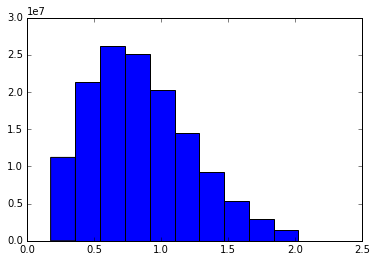

In [13]:
hist(data_array[:,4])

In [17]:
bin1 = data_array[data_array[:,4] > 0.475]

In [19]:
bin1 = bin1[bin1[:,4] < 0.675]

In [20]:
bin1.shape

(27292883, 5)

In [21]:
from six.moves import cPickle as pickle

with open('euclid_bin1.dat', 'wb') as f:
    pickle.dump(bin1, f, pickle.HIGHEST_PROTOCOL)
